
|             Name            |    ID    |       Part      |
|:---------------------------:|:--------:|:---------------:|
| Ahmed Mohamed Abdel-Rashied | 20180028 | Fuzzification   |
| Ahmed Rushdi El-Kilany      | 20180008 | Fuzzy inference |
| Eslam Nasser Abdelqader     | 20180047 | Defuzzification |

#Inputs

In [1]:
nose_crisp = 10
teeth_crisp = 10
lips_crisp = 10
forehead_crisp = 10
eyebrows_crisp = 10
cheeks_crisp = 10
eyes_crisp = 10
chin_crisp = 10

#Fuzzification


In [2]:
!pip install -U scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from math import sqrt

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.7/dist-packages (0.4.2)


## Nose

In [3]:
def nose_fuzzifier(value):
  counter_wrinkled=1/20
  wrinkled=np.zeros(60)
  for i in range(60):
    if i <40:
      wrinkled[i]=1
    else:
      wrinkled[i-1]=round(wrinkled[i-1],3)
      wrinkled[i]=wrinkled[i-1]-counter_wrinkled
  normal=np.array(list(reversed(wrinkled)))
  if value <60:
    fuzzy1=wrinkled[value]
  else:
    fuzzy1=0
  if value>= 40 and value<100:
    fuzzy2=normal[value-40]
  elif value<40:
    fuzzy2=0
  else:
    fuzzy2=1
  return fuzzy1,fuzzy2


## Teeth

In [4]:
def teeth_fuzzifier(value):
  not_visible=np.zeros(30)
  for i in range(30):
    if i <10:
      not_visible[i]=1
    else:
      not_visible[i-1]=round(not_visible[i-1],3)
      not_visible[i]=not_visible[i-1]-1/20
  normal=np.zeros(60)
  for i in range(60):
    if i <= 30:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/30
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[i-1]- 1/30
  open=np.zeros(30)
  for i in range(30):
    if i<20:
      if i== 0:
        open[i]=0
      else:
        open[i-1]=round(open[i-1],3)
        open[i]=open[i-1]+1/20
    else:
      open[i]=1

    if value <30:
      fuzzy1=not_visible[value]
    else:
      fuzzy1=0
    if value>= 10 and value<70:
      fuzzy2=normal[value-10]
    else:
      fuzzy2=0
    if value >=50 and value <80:
      fuzzy3=open[value-50]
    elif value<50:
      fuzzy3=0
    else:
      fuzzy3=1
  return fuzzy1,fuzzy2,fuzzy3


## Lips

In [5]:
def lips_fuzzifier(value):
  closed=np.zeros(30)
  for i in range(30):
    if i <10:
      closed[i]=1
    else:
      closed[i-1]=round(closed[i-1],3)
      closed[i]=closed[i-1]-1/20
  normal=np.zeros(60)
  for i in range(60):
    if i <= 30:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/30
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[i-1]- 1/30
  open=np.zeros(30)
  for i in range(30):
    if i<20:
      if i== 0:
        open[i]=0
      else:
        open[i-1]=round(open[i-1],3)
        open[i]=open[i-1]+1/20
    else:
      open[i]=1

    if value <30:
      fuzzy1=closed[value]
    else:
      fuzzy1=0
    if value>= 10 and value<70:
      fuzzy2=normal[value-10]
    else:
      fuzzy2=0
    if value >=50 and value <80:
      fuzzy3=open[value-50]
    elif value<50:
      fuzzy3=0
    else:
      fuzzy3=1
  return fuzzy1,fuzzy2,fuzzy3

## Forehead

In [6]:
def forehead_fuzzifier(value):
  small=np.zeros(4)
  for i in range(4):
    if i <2:
      small[i]=1
    else:
      small[i-1]=round(small[i-1],3)
      small[i]=small[i-1]-1/2
  normal=np.zeros(13)
  for i in range(13):
    if i < 7:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/7
    elif i==7:
      normal[i]=1
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[i-1]- 1/6
  bigger=np.zeros(10)
  for i in range(10):
    if i<5:
      if i== 0:
        bigger[i]=0
      else:
        bigger[i-1]=round(bigger[i-1],3)
        bigger[i]=bigger[i-1]+1/20
    else:
      bigger[i]=1

    if value <4:
      fuzzy1=small[value]
    else:
      fuzzy1=0
    if value>= 2 and value<15:
      fuzzy2=normal[value-2]
    else:
      fuzzy2=0
    if value >=10 and value <20:
      fuzzy3=bigger[value-10]
    elif value<10:
      fuzzy3=0
    else:
      fuzzy3=1
  return fuzzy1,fuzzy2,fuzzy3


## Eyebrows

In [7]:
def eyebrows_fuzzifier(value):
  centerd=np.zeros(20)
  for i in range(20):
    if i <10:
      centerd[i]=1
    else:
      centerd[i-1]=round(centerd[i-1],3)
      centerd[i]=centerd[i-1]-1/10
  normal=np.zeros(50)
  for i in range(50):
    if i <= 25:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/25
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[-i]
  outward=np.zeros(30)
  for i in range(30):
    if i<20:
      if i== 0:
        outward[i]=0
      else:
        outward[i-1]=round(outward[i-1],3)
        outward[i]=outward[i-1]+1/20
    else:
      outward[i]=1

    if value <20:
      fuzzy1=centerd[value]
    else:
      fuzzy1=0
    if value>= 10 and value<60:
      fuzzy2=normal[value-10]
    else:
      fuzzy2=0
    if value >=40 and value <70:
      fuzzy3=open[value-40]
    elif value<40:
      fuzzy3=0
    else:
      fuzzy3=1
  return fuzzy1,fuzzy2,fuzzy3


## Cheeks

In [8]:
def cheeks_fuzzifier(value):
  flat=np.zeros(20)
  for i in range(20):
    if i <10:
      flat[i]=1
    else:
      flat[i-1]=round(flat[i-1],3)
      flat[i]=flat[i-1]-1/10
  normal=np.zeros(50)
  for i in range(50):
    if i <= 25:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/25
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[-i]
  filled=np.zeros(30)
  for i in range(30):
    if i<20:
      if i== 0:
        filled[i]=0
      else:
        filled[i-1]=round(filled[i-1],3)
        filled[i]=filled[i-1]+1/20
    else:
      filled[i]=1
    if value <20:
      fuzzy1=flat[value]
    else:
      fuzzy1=0
    if value>= 10 and value<60:
      fuzzy2=normal[value-10]
    else:
      fuzzy2=0
    if value >=40 and value <70:
      fuzzy3=filled[value-40]
    elif value<40:
      fuzzy3=0
    else:
      fuzzy3=1
  return fuzzy1,fuzzy2,fuzzy3
cheeks_fuzzifier(50)

(0, 0.4, 0.5)

## Eyes

In [9]:
def eye_fuzzifier(value):
  pressed=np.zeros(10)
  for i in range(10):
    if i <5:
      pressed[i]=1
    else:
      pressed[i-1]=round(pressed[i-1],3)
      pressed[i]=pressed[i-1]-1/5
  closed=np.zeros(25)
  for i in range(25):
    if i <= 13:
      if i ==0:
        closed[i]=0
      else:  
        closed[i-1]=round(closed[i-1],3)
        closed[i]=closed[i-1]+ 1/13
    else:
      closed[i-1]=round(closed[i-1],3)
      closed[i]=closed[-i]
  normal=np.zeros(50)
  for i in range(50):
    if i <= 25:
      if i ==0:
        normal[i]=0
      else:  
        normal[i-1]=round(normal[i-1],3)
        normal[i]=normal[i-1]+ 1/25
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[-i]
    
  extra=np.zeros(30)
  for i in range(30):
    if i<20:
      if i== 0:
        extra[i]=0
      else:
        extra[i-1]=round(extra[i-1],3)
        extra[i]=extra[i-1]+1/20
    else:
      extra[i]=1
    if value <10:
      fuzzy1=pressed[value]
    else:
      fuzzy1=0
    if value>= 5 and value<30:
      fuzzy2=closed[value-5]
    else:
      fuzzy2=0
    if value>= 20 and value<70:
      fuzzy3=normal[value-20]
    else:
      fuzzy3=0
    if value >=50 and value <80:
      fuzzy4=extra[value-50]
    elif value<50:
      fuzzy4=0
    else:
      fuzzy4=1
  return fuzzy1,fuzzy2,fuzzy3,fuzzy4


##Chin

In [10]:
def chin_fuzzifier(value):
  counter_wrinkled=1/20
  normal=np.zeros(60)
  for i in range(60):
    if i <40:
      normal[i]=1
    else:
      normal[i-1]=round(normal[i-1],3)
      normal[i]=normal[i-1]-counter_wrinkled
  radical=np.array(list(reversed(normal)))
  if value <60:
    fuzzy1=normal[value]
  else:
    fuzzy1=0
  if value>= 40 and value<100:
    fuzzy2=radical[value-40]
  elif value<40:
    fuzzy2=0
  else:
    fuzzy2=1
  return fuzzy1,fuzzy2


#Fuzzy Inference

## Rules

### If cheeks Up ˄ Teeth Slightly Out ˄ Lips open Then Happy

In [11]:
happy = [cheeks_fuzzifier(cheeks_crisp)[2],teeth_fuzzifier(teeth_crisp)[1],lips_fuzzifier(lips_crisp)[2]]
happy_value = min(happy)
happy

[0, 0.0, 0]

###If Eyebrows Centered ˄ Lips Normal ˄ cheeks Flat Then Sad

In [12]:
sad = [eyebrows_fuzzifier(eyebrows_crisp)[0],lips_fuzzifier(lips_crisp)[0],cheeks_fuzzifier(cheeks_crisp)[0]]
sad_value = min(sad)
sad

[0.9, 0.95, 0.9]

### If Eyebrows Centered ˄ Lips Pressed-closed ˄ cheeks Flat ˄ Teeth Not-visible Then Angry

In [13]:
angry = [eyebrows_fuzzifier(eyebrows_crisp)[0],lips_fuzzifier(lips_crisp)[0],cheeks_fuzzifier(cheeks_crisp)[0],teeth_fuzzifier(teeth_crisp)[0]]
angry_value = min(angry)
angry

[0.9, 0.95, 0.9, 0.95]

###If Eye extra open ˄ Lips open ˄ Eyebrows Outward- Stretched Then Surprise

In [14]:
surprise = [eye_fuzzifier(eyes_crisp)[3],lips_fuzzifier(lips_crisp)[2],eyebrows_fuzzifier(eyebrows_crisp)[2]]
surprise_value = min(surprise)
surprise

[0, 0, 0]

###If Eyebrows Normal ˄ Lips Normal ˄ cheeks Flat ˄ Eye Normal open Then Normal

In [15]:
normal = [eyebrows_fuzzifier(eyebrows_crisp)[1],lips_fuzzifier(lips_crisp)[1],cheeks_fuzzifier(cheeks_crisp)[0],eye_fuzzifier(eyes_crisp)[2]]
normal_value = min(normal)
normal

[0.0, 0.0, 0.9, 0]

### If Eyebrows Outward-Stretched ˄ cheeks Normal ˄ Eyes Extra-open ˄ Lips Open Then Fear

In [16]:
fear = [eyebrows_fuzzifier(eyebrows_crisp)[2],cheeks_fuzzifier(cheeks_crisp)[1],eye_fuzzifier(eyes_crisp)[3],lips_fuzzifier(lips_crisp)[2]]
fear_value = min(fear)
fear

[0, 0.0, 0, 0]

###If Eyebrows Centered ˄ cheeks Up ˄ nose wrinkled Then Disgust

In [17]:
disgust = [eyebrows_fuzzifier(eyebrows_crisp)[0],cheeks_fuzzifier(cheeks_crisp)[2],nose_fuzzifier(nose_crisp)[0]]
disgust_value = min(disgust)
disgust

[0.9, 0, 1.0]

##Center of gravity

In [18]:
output_membership = [angry_value,disgust_value,sad_value,normal_value,happy_value,surprise_value,fear_value]
if not any(output_membership):
  result = False
output_membership

[0.9, 0, 0.9, 0.0, 0, 0, 0]

### Build output membership functions

In [19]:
def centroid_trapezium(o,a,b,c):
  t1 = a**2 + b**2 + a*b + b*c + 2*a*c
  t2 = 3*(a+b)
  return o + (t1/t2)

def anger_area(value):
  c = 0
  base = 6
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(4,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c) #A=(a+b/2)*h

def disgust_area(value):
  c = 0
  base = 20
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = slope_length * value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(5,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)

def sad_area(value):
  c = 0
  base = 20
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = slope_length * value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(15,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)

def normal_area(value):
  c = 0
  base = 20
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = slope_length * value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(30,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)

def happy_area(value):
  c = 0
  base = 15
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = slope_length * value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(45,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)

def surprise_area(value):
  c = 0
  base = 20
  slope_length = sqrt(base**2 + 1**2)
  right_side = slope_length * value #traingle ratio 
  left_side = slope_length * value
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(55,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)

def fear_area(value):
  c = 0
  base = 10
  slope_length = sqrt(base**2 + 1**2)
  right_side = value 
  left_side = slope_length * value #traingle ratio 
  top_side = (1-value) * base  # * base
  if value != 0:
    d_from_o = sqrt( left_side**2 - value**2)
    c = centroid_trapezium(70,top_side,base,d_from_o)
  return (((top_side + base)/2)*value , c)



In [20]:
def areas(op):
  return [anger_area(op[0]),disgust_area(op[1]),sad_area(op[2]),normal_area(op[3]),happy_area(op[4]),surprise_area(op[5]),fear_area(op[6])]

#Defuzzification

In [21]:
def defuzzification(inferenceSet):
  multiplier = (inferenceSet[0][0]*inferenceSet[0][1]) + (inferenceSet[1][0]*inferenceSet[1][1]) + (inferenceSet[2][0]*inferenceSet[2][1]) + (inferenceSet[3][0]*inferenceSet[3][1])+ (inferenceSet[4][0]*inferenceSet[4][1])+ (inferenceSet[5][0]*inferenceSet[5][1])+ (inferenceSet[6][0]*inferenceSet[6][1])
  divider = inferenceSet[0][0] + inferenceSet[1][0] + inferenceSet[2][0]+ (inferenceSet[3][0])+ (inferenceSet[4][0])+ (inferenceSet[5][0])+ (inferenceSet[6][0])
  return multiplier/divider
  

In [22]:
inf_set = areas(output_membership)
inf_set

[(2.9699999999999998, 6.0181818181818185),
 (0.0, 0),
 (9.9, 28.272727272727273),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0)]

In [23]:
defuzzification(inf_set)

23.13706293706294

#Using built-in Library


In [24]:
nose = ctrl.Antecedent(np.arange(0,100,0.1),'nose')
teeth = ctrl.Antecedent(np.arange(0,100,0.1),'teeth')
lips = ctrl.Antecedent(np.arange(0,100,0.1),'lips')
forehead = ctrl.Antecedent(np.arange(0,25,0.1),'forehead')
eyebrows = ctrl.Antecedent(np.arange(0,100,0.1),'eyebrows')
eyes = ctrl.Antecedent(np.arange(0,100,0.1),'eyes')
cheeks = ctrl.Antecedent(np.arange(0,100,0.1),'cheeks')
chin = ctrl.Antecedent(np.arange(0,100,0.1),'chin')

nose["Wrinkled"] = fuzz.trimf(nose.universe,[40,40,60])
nose["Normal"] = fuzz.trimf(nose.universe,[40,60,60])

teeth["Not-visible"] = fuzz.trimf(teeth.universe,[10,10,30])
teeth["Slightly-out"] = fuzz.trimf(teeth.universe,[10,40,70])
teeth["Extra-open"] = fuzz.trimf(teeth.universe,[50,70,70])\

lips["Pressed-closed"] = fuzz.trimf(lips.universe,[10,10,30])
lips["Normal"] = fuzz.trimf(lips.universe,[10,40,70])
lips["Open"] = fuzz.trimf(lips.universe,[50,70,70])

forehead["Down & small"] = fuzz.trimf(forehead.universe,[2,2,4])
forehead["Normal"] = fuzz.trimf(forehead.universe,[2,8.5,15])
forehead["Stretched & bigger"] = fuzz.trimf(forehead.universe,[10,15,15])

eyebrows["Centered"] = fuzz.trimf(eyebrows.universe,[10,10,20])
eyebrows["Normal"] = fuzz.trimf(eyebrows.universe,[10,35,60])
eyebrows["Outward-stretched"] = fuzz.trimf(eyebrows.universe,[40,60,60])

eyes["Pressed-closed"] = fuzz.trimf(eyes.universe,[5,5,10])
eyes["Closed"] = fuzz.trimf(eyes.universe,[5,15,30])
eyes["Normal-open"] = fuzz.trimf(eyes.universe,[20,45,70])
eyes["Extra-open"] = fuzz.trimf(eyes.universe,[50,70,70])

cheeks["Flat & stretched"] = fuzz.trimf(cheeks.universe,[10,10,20])
cheeks["Normal"] = fuzz.trimf(cheeks.universe,[10,35,60])
cheeks["Filled & Up"] = fuzz.trimf(cheeks.universe,[40,60,60])

chin["Normal"] = fuzz.trimf(chin.universe,[40,40,60])
chin["Radical"] = fuzz.trimf(chin.universe,[40,60,60])


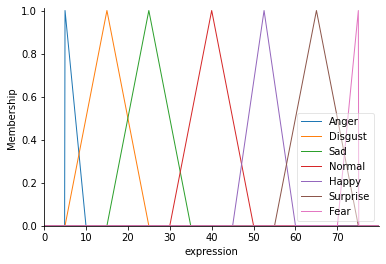

In [25]:
expression =  ctrl.Consequent(np.arange(0,80,0.1),"expression")
expression['Anger'] = fuzz.trimf(expression.universe,[5,5,10])
expression['Disgust'] = fuzz.trimf(expression.universe,[5,15,25])
expression['Sad'] = fuzz.trimf(expression.universe,[15,25,35])
expression['Normal'] = fuzz.trimf(expression.universe,[30,40,50])
expression['Happy'] = fuzz.trimf(expression.universe,[45,52.5,60])
expression['Surprise'] = fuzz.trimf(expression.universe,[55,65,75])
expression['Fear'] = fuzz.trimf(expression.universe,[70,75,75])

expression.view()

In [26]:
rule1 = ctrl.Rule(cheeks["Filled & Up"] & teeth["Slightly-out"] & lips["Open"], expression['Happy'])
rule2 = ctrl.Rule(eyebrows["Centered"] & lips["Normal"] & cheeks["Flat & stretched"], expression['Sad'])
rule3 = ctrl.Rule(eyebrows["Centered"] & lips["Pressed-closed"] & cheeks["Flat & stretched"] & teeth["Not-visible"], expression['Anger'])
rule4 = ctrl.Rule(eyes["Extra-open"] & lips["Open"] & eyebrows["Outward-stretched"], expression['Surprise'])
rule5 = ctrl.Rule(eyebrows["Normal"] & lips["Normal"] & cheeks["Flat & stretched"] & eyes["Normal-open"] & chin["Normal"], expression['Normal'])
rule6 = ctrl.Rule(eyebrows["Outward-stretched"] & cheeks["Normal"] & eyes["Extra-open"] & lips["Open"] & forehead["Stretched & bigger"], expression['Fear'])
rule7 = ctrl.Rule(eyebrows["Centered"] & cheeks["Filled & Up"] & nose["Wrinkled"], expression['Disgust'])

In [27]:
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
system_sim = ctrl.ControlSystemSimulation(system)

In [29]:
system_sim.input['nose'] = nose_crisp
system_sim.input['teeth'] = teeth_crisp
system_sim.input['lips'] = lips_crisp
system_sim.input['forehead'] = forehead_crisp
system_sim.input['eyebrows'] = eyebrows_crisp
system_sim.input['cheeks'] = cheeks_crisp
system_sim.input['eyes'] = eyes_crisp
system_sim.input['chin'] = chin_crisp

system_sim.compute()
system_sim.output['expression']

6.633333333333333